Melakukan Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

df = pd.read_csv("german_credit_data.csv")
df.columns = df.columns.str.strip()

Menghilangkan kolom yang tidak perlu

In [2]:
df = df.drop(columns=["Unnamed: 0"])

Data Exploration

In [3]:
df.head()

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  
0         6             radio/TV  
1        48             radio/TV  
2        12            education  
3        42  furniture/equipment  
4        24                  car

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [5]:
df.describe(include='all')

Age   Sex          Job Housing Saving accounts  \
count   1000.000000  1000  1000.000000    1000             817   
unique          NaN     2          NaN       3               4   
top             NaN  male          NaN     own          little   
freq            NaN   690          NaN     713             603   
mean      35.546000   NaN     1.904000     NaN             NaN   
std       11.375469   NaN     0.653614     NaN             NaN   
min       19.000000   NaN     0.000000     NaN             NaN   
25%       27.000000   NaN     2.000000     NaN             NaN   
50%       33.000000   NaN     2.000000     NaN             NaN   
75%       42.000000   NaN     2.000000     NaN             NaN   
max       75.000000   NaN     3.000000     NaN             NaN   

       Checking account  Credit amount     Duration Purpose  
count               606    1000.000000  1000.000000    1000  
unique                3            NaN          NaN       8  
top              little            NaN          NaN     car  
freq                274            NaN          NaN     337  
mean                NaN    3271.258000    20.903000     NaN  
std                 NaN    2822.736876    12.058814     NaN  
min                 NaN     250.000000     4.000000     NaN  
25%                 NaN    1365.500000    12.000000     NaN  
50%                 NaN    2319.500000    18.000000     NaN  
75%                 NaN    3972.250000    24.000000     NaN  
max                 NaN   18424.000000    72.000000     NaN

In [6]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

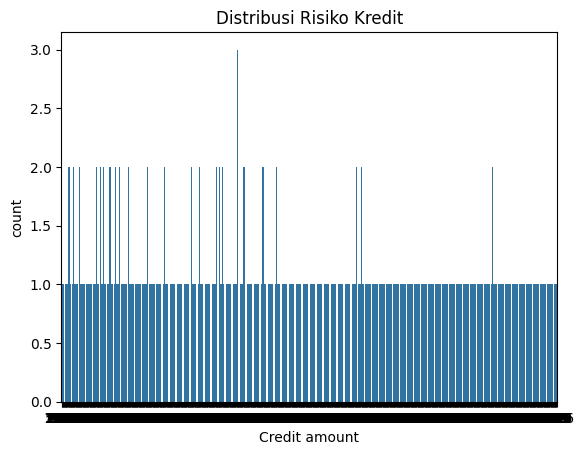

In [7]:
target_col = "Credit amount"
df[target_col] = df[target_col].astype(str)
sns.countplot(x=target_col, data=df)
plt.title("Distribusi Risiko Kredit")
plt.show()

Data Preparation

In [8]:
df["Credit amount"] = pd.to_numeric(df["Credit amount"], errors='coerce')
print(df["Credit amount"].isnull().sum())

0


In [9]:
df["Risk_binary"] = df["Credit amount"].apply(lambda x: "good" if x >= 10000 else "bad")

from sklearn.preprocessing import LabelEncoder
le_risk = LabelEncoder()
df["Risk_binary"] = le_risk.fit_transform(df["Risk_binary"])

print(df["Risk_binary"].value_counts())


Risk_binary
0    960
1     40
Name: count, dtype: int64


In [10]:
X = df.drop(columns=["Risk_binary"])
y = df["Risk_binary"]

In [11]:
categorical_cols = X.select_dtypes(include="object").columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

K-means Clustering

In [13]:
inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

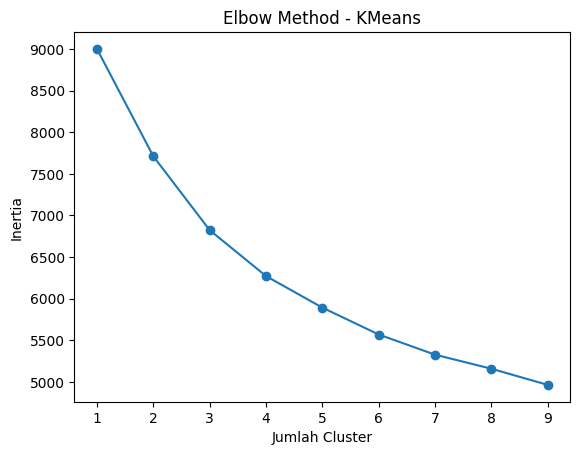

In [14]:
plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method - KMeans")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.show()

In [15]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Credit amount"] = kmeans.fit_predict(X_scaled)

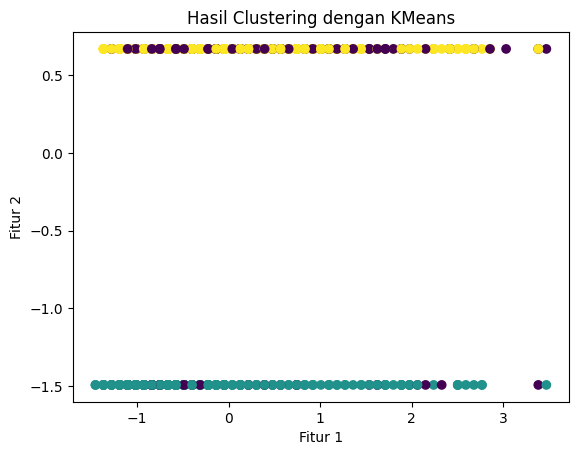

In [16]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df["Credit amount"], cmap='viridis')
plt.title("Hasil Clustering dengan KMeans")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.show()

Logistic Regression

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

In [20]:
print("\nüìä Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


üìä Confusion Matrix:
[[196   0]
 [  0   4]]


In [21]:
print("\nüìã Classification Report:")
print(classification_report(y_test, y_pred))


üìã Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       196
           1       1.00      1.00      1.00         4

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [22]:
roc_score = roc_auc_score(y_pred, y_proba)
print(f"\nüìà ROC-AUC Score: {roc_score:.4f}")


üìà ROC-AUC Score: 1.0000


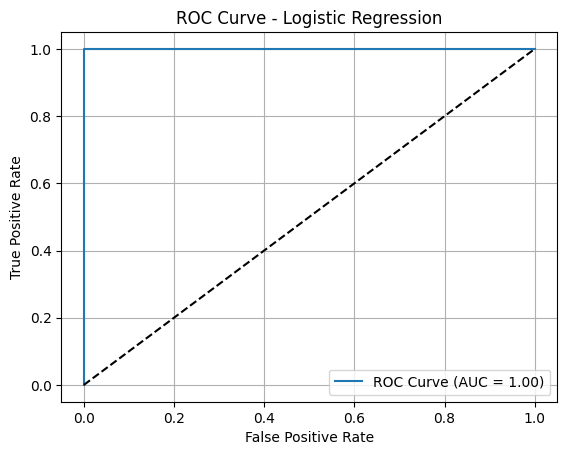

In [23]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid()
plt.show()

Streamlit

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

st.set_page_config(page_title="German Credit Risk Analyzer", layout="centered")
st.title("üìä German Credit Risk Analyzer")

tab1, tab2, tab3 = st.tabs(["üìö Train Model", "üîç Predict", "üîé Clustering"])

# --- Tab 1: Supervised Learning (Logistic Regression) ---
with tab1:
    st.header("üìö Train Model - Logistic Regression")

    uploaded_file = st.file_uploader("Upload CSV data (german_credit_data.csv)", type=["csv"])
    if uploaded_file:
        df = pd.read_csv(uploaded_file)
        df.columns = df.columns.str.strip()
        df.drop(columns=["Unnamed: 0"], errors="ignore", inplace=True)
        df["Credit amount"] = pd.to_numeric(df["Credit amount"], errors='coerce')

        df["Risk_binary"] = df["Credit amount"].apply(lambda x: "good" if x >= 10000 else "bad")
        le = LabelEncoder()
        df["Risk_binary"] = le.fit_transform(df["Risk_binary"])

        X = df[["Age", "Job", "Credit amount", "Duration", "Housing"]]
        y = df["Risk_binary"]

        for col in X.select_dtypes(include='object').columns:
            X[col] = LabelEncoder().fit_transform(X[col])

        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        split_ratio = st.selectbox("Pilih rasio test set", [0.3, 0.2, 0.35, 0.25])
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=split_ratio, random_state=42)

        logreg = LogisticRegression(max_iter=1000)
        logreg.fit(X_train, y_train)

        with open("model_logreg.pkl", "wb") as f:
            pickle.dump(logreg, f)
        with open("scaler.pkl", "wb") as f:
            pickle.dump(scaler, f)

        st.success("‚úÖ Model dan scaler berhasil disimpan.")
        st.write("Akurasi training:", logreg.score(X_train, y_train))
        st.write("Akurasi testing:", logreg.score(X_test, y_test))

        y_pred = logreg.predict(X_test)

        st.subheader("üìä Confusion Matrix")
        st.text(confusion_matrix(y_test, y_pred))

        st.subheader("üìã Classification Report")
        st.text(classification_report(y_test, y_pred))

        st.subheader("üìà ROC Curve")
        fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
        roc_auc = auc(fpr, tpr)

        fig_roc, ax_roc = plt.subplots()
        ax_roc.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        ax_roc.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax_roc.set_xlim([0.0, 1.0])
        ax_roc.set_ylim([0.0, 1.05])
        ax_roc.set_xlabel('False Positive Rate')
        ax_roc.set_ylabel('True Positive Rate')
        ax_roc.set_title('Receiver Operating Characteristic')
        ax_roc.legend(loc="lower right")
        st.pyplot(fig_roc)

# --- Tab 2: Prediction ---
with tab2:
    st.header("üîç Predict")

    try:
        with open("model_logreg.pkl", "rb") as f:
            model = pickle.load(f)
        with open("scaler.pkl", "rb") as f:
            scaler = pickle.load(f)
    except FileNotFoundError:
        st.warning("‚ö†Ô∏è Model belum dilatih. Silakan train model dulu di tab pertama.")
        st.stop()

    st.subheader("Masukkan Data Nasabah")
    age = st.slider("Age", 18, 75, 30)
    job = st.selectbox("Job", [0, 1, 2, 3])
    credit_amount = st.number_input("Credit Amount", value=2000)
    duration = st.number_input("Duration (months)", value=12)
    housing = st.selectbox("Housing", ["own", "free", "rent"])
    housing_encoded = {"own": 2, "free": 0, "rent": 1}[housing]

    if st.button("Submit"):
        input_data = pd.DataFrame([{
            "Age": age,
            "Job": job,
            "Credit amount": credit_amount,
            "Duration": duration,
            "Housing": housing_encoded
        }])

        input_scaled = scaler.transform(input_data)
        prediction = model.predict(input_scaled)[0]
        proba = model.predict_proba(input_scaled)[0][prediction]

        st.markdown("---")
        st.subheader("üìä Hasil Prediksi")
        st.write(f"üìå Prediksi Risiko: **{'Bad' if prediction else 'Good'}**")
        st.write(f"üìà Probabilitas: `{proba:.2f}`")

        st.markdown("---")
        st.subheader("üßæ Ringkasan Data Nasabah")
        display_data = input_data.copy()
        display_data["Housing"] = housing
        st.table(display_data)

        st.subheader("üìä Visualisasi Data Input")
        input_data_numeric = input_data.select_dtypes(include=np.number)
        numeric_data = input_data_numeric.iloc[0]

        fig, ax = plt.subplots(figsize=(8, 4))
        bars = sns.barplot(x=numeric_data.index, y=numeric_data.values, palette="viridis", ax=ax)

        for bar in bars.patches:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + max(numeric_data.values) * 0.02,
                f'{height:.0f}',
                ha='center',
                va='bottom',
                fontsize=9,
                color='black'
            )

        ax.set_title("Data Input Nasabah", fontsize=14, fontweight='bold')
        ax.set_ylabel("Nilai")
        ax.set_xlabel("Fitur")
        plt.xticks(rotation=30)
        ax.grid(axis='y', linestyle='--', alpha=0.6)
        st.pyplot(fig)

# --- Tab 3: Unsupervised Learning (KMeans) ---
with tab3:
    st.header("üîé Clustering - KMeans")

    uploaded_file_km = st.file_uploader("Upload CSV data untuk Clustering", type=["csv"], key="clustering")
    if uploaded_file_km:
        df_km = pd.read_csv(uploaded_file_km)
        df_km.columns = df_km.columns.str.strip()
        df_km.drop(columns=["Unnamed: 0"], errors="ignore", inplace=True)

        X_km = df_km[["Age", "Job", "Credit amount", "Duration"]].copy()
        X_km = X_km.dropna()
        X_km_scaled = StandardScaler().fit_transform(X_km)

        cluster_count = st.selectbox("Pilih jumlah cluster", [3, 4, 5, 6])
        kmeans = KMeans(n_clusters=cluster_count, random_state=42)
        df_km["Cluster"] = kmeans.fit_predict(X_km_scaled)

        st.subheader("Hasil Clustering")
        st.write(df_km[["Age", "Job", "Credit amount", "Duration", "Cluster"]].head())

        st.subheader("Visualisasi Clustering (PCA 2D)")
        pcs = PCA(n_components=2).fit_transform(X_km_scaled)
        df_km["PC1"] = pcs[:, 0]
        df_km["PC2"] = pcs[:, 1]

        fig2, ax2 = plt.subplots()
        sns.scatterplot(data=df_km, x="PC1", y="PC2", hue="Cluster", palette="Set2", ax=ax2)
        ax2.set_title("Visualisasi Clustering (PCA)")
        st.pyplot(fig2)

2025-06-03 22:51:09.496 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-03 22:51:10.159 
  command:

    streamlit run C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-03 22:51:10.159 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-03 22:51:10.160 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-03 22:51:10.161 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-03 22:51:10.161 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-03 22:51:10.162 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-03 22:51:10.162 Thread 

DeltaGenerator()